In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from pathlib import Path

In [2]:
headers = ['E','EA','errors']

# X1 + Collimator
X1C = pd.read_csv('EA_X1+3DPC.csv',names=headers)
E_X1C = X1C['E']
EA_X1C = X1C['EA']
error_X1C = X1C['errors']

# X1 
X1 = pd.read_csv('EA_X1.csv',names=headers)
E_X1 = X1['E']
EA_X1 = X1['EA']
error_X1 = X1['errors']

# X4
X4 = pd.read_csv('EA_X4.csv',names=headers)
E_X4 = X4['E']
EA_X4 = X4['EA']
error_X4 = X4['errors']


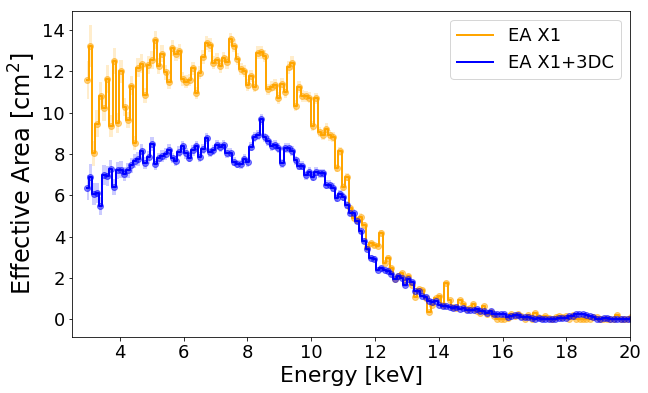

In [3]:
# plot
plt.figure(figsize=(10,6))
plt.step(E_X1[:213], EA_X1[:213], where='mid',linewidth=2,color='orange',label='EA X1')
plt.plot(E_X1[:213],EA_X1[:213],'C1o',color='orange',alpha=0.5,label='_nolegend_')
plt.fill_between(E_X1[:213],EA_X1[:213]-error_X1[:213],
                 EA_X1[:213]+error_X1[:213],alpha=0.2,color='orange',linewidth=0, step='mid')
plt.step(E_X1C[:213], EA_X1C[:213], where='mid',linewidth=2,color='blue',label='EA X1+3DC')
plt.plot(E_X1C[:213],EA_X1C[:213],'C1o',color='blue',alpha=0.5,label='_nolegend_')
plt.fill_between(E_X1C[:213],EA_X1C[:213]-error_X1C[:213],
                 EA_X1C[:213]+error_X1C[:213],alpha=0.2,color='blue',linewidth=0, step='mid')
plt.xlim(2.5,20)
#plt.step(X4E, X4EA, where='mid',linewidth=2,color='orange',label='X4 in front of SDD')
#plt.plot(X4E,X4EA,'C1o',color='orange',alpha=0.5,label='_nolegend_')
#plt.fill_between(X4E,X4EA-X4error,
#                 X4EA+X4error,alpha=0.5,color='orange',linewidth=0, step='mid')
#plt.step(E_old, EA_old, where='mid',linewidth=2,color='green',label='FOXSI2 Software')
#plt.plot(E_old,EA_old,'C1o',color='green',alpha=0.5,label='_nolegend_')
plt.xlabel('Energy [keV]',fontsize=22)
plt.ylabel('Effective Area [cm$^2$]',fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)
plt.show()

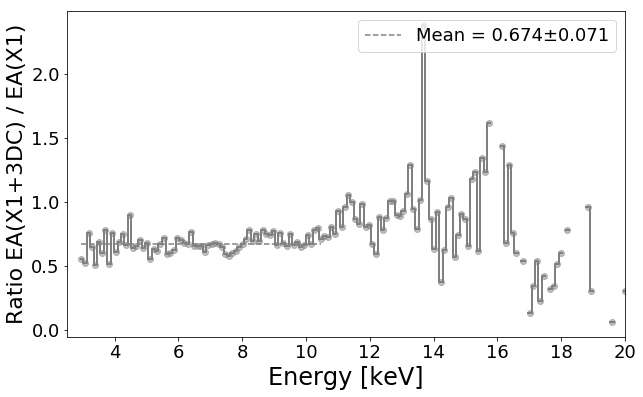

In [4]:
# plot
plt.figure(figsize=(10,6))
plt.step(E_X1C[:213], EA_X1C[:213]/EA_X1[:213], where='mid',linewidth=2,color='gray',label='_nolegend_')
plt.plot(E_X1C[:213], EA_X1C[:213]/EA_X1[:213],'C1o',color='gray',alpha=0.5,label='_nolegend_')
plt.xlabel('Energy [keV]',fontsize=24)
plt.ylabel('Ratio EA(X1+3DC) / EA(X1)',fontsize=22)
plt.xlim(2.5,20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
index = 70
mean = np.mean(EA_X1C[:index]/EA_X1[:index])
std  = np.std(EA_X1C[:index]/EA_X1[:index])
plt.hlines(mean,E_X1C[0],E_X1C[index],linestyle='dashed',color='gray',
           label='Mean = '+str(round(mean,3))+u"\u00B1"+str(round(std,3)))
plt.legend(fontsize=18,loc='upper right')
plt.show()

In [5]:
index = 90
print(np.std(EA_X1C[:index]/EA_X1[:index]))
print(E_X1C[index])

0.10436941000459106
12.62


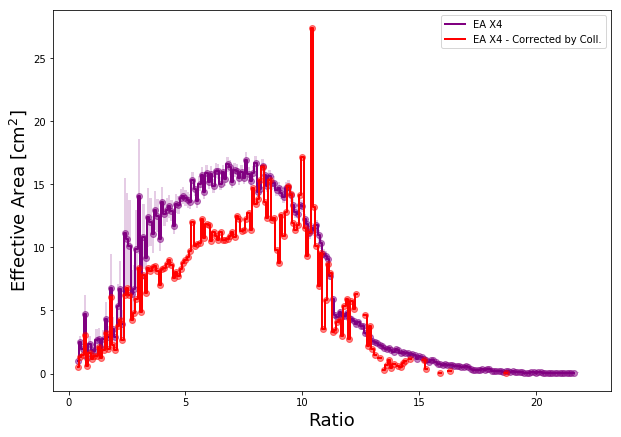

In [6]:
# plot
plt.figure(figsize=(10,7))
plt.step(E_X4[:213], EA_X4[:213], where='mid',linewidth=2,color='purple',label='EA X4')
plt.plot(E_X4[:213], EA_X4[:213],'C1o',color='purple',alpha=0.5,label='_nolegend_')
plt.fill_between(E_X4,EA_X4-error_X4,
                 EA_X4+error_X4,alpha=0.2,color='purple',linewidth=0, step='mid')

plt.step(E_X4[:213], EA_X4[:213]*(EA_X1C[:213]/EA_X1[:213]), where='mid',linewidth=2,color='red',label='EA X4 - Corrected by Coll.')
plt.plot(E_X4[:213], EA_X4[:213]*(EA_X1C[:213]/EA_X1[:213]),'C1o',color='red',alpha=0.5,label='_nolegend_')

plt.xlabel('Ratio',fontsize=18)
plt.ylabel('Effective Area [cm$^2$]',fontsize=18)
plt.legend()
plt.show()

## Estimate Effect of the 3D Collimator based on Open Area measurements

The Collimator Only affects the most inner shells of a 7-mirrors optics.

| Outer R | Middle R   |
|------|------|
| 53.45	| 51.5 | 
| 50.85	| 49 | 
| 48.35	| 46.6 |
| 45.95	| 44.3 |
| 43.65	| 42.1 |
| 41.5	| 40 |
| 39.4	| 38 |

In [7]:
Ro = np.array([53.45, 50.85, 48.35, 45.95, 43.65, 41.5, 39.4])*.1
Rm = np.array([51.5, 49, 46.6, 44.3, 42.1, 40, 38])*.1

In [8]:
GeoArea = np.pi * ( Ro**2 - Rm**2 )

In [9]:
GeoArea.sum()

33.55134560235934

In [10]:
OpAr = 0.32
CollOpenArea = np.array([1.0, 1.0, 1.0, OpAr, OpAr, OpAr, OpAr])

In [11]:
(GeoArea * CollOpenArea).sum()

22.60428378855177

In [12]:
ratio = (GeoArea * CollOpenArea).sum()/GeoArea.sum()
ratio

0.67372212299474

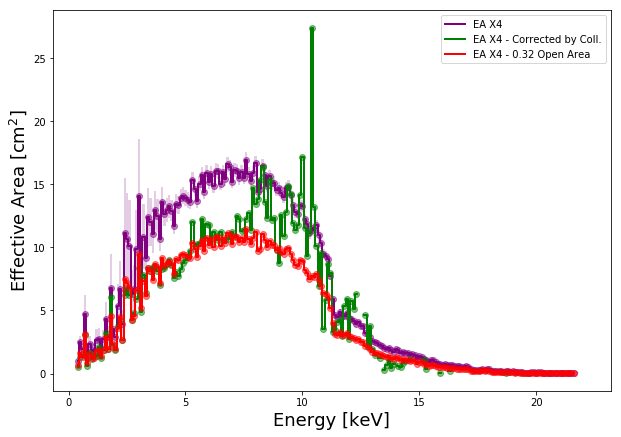

In [13]:
# plot
plt.figure(figsize=(10,7))
plt.step(E_X4[:213], EA_X4[:213], where='mid',linewidth=2,color='purple',label='EA X4')
plt.plot(E_X4[:213], EA_X4[:213],'C1o',color='purple',alpha=0.5,label='_nolegend_')
plt.fill_between(E_X4,EA_X4-error_X4,
                 EA_X4+error_X4,alpha=0.2,color='purple',linewidth=0, step='mid')

plt.step(E_X4[:213], EA_X4[:213]*(EA_X1C[:213]/EA_X1[:213]), where='mid',linewidth=2,color='green',label='EA X4 - Corrected by Coll.')
plt.plot(E_X4[:213], EA_X4[:213]*(EA_X1C[:213]/EA_X1[:213]),'C1o',color='green',alpha=0.5,label='_nolegend_')

plt.step(E_X4[:213], ratio*EA_X4[:213], where='mid',linewidth=2,color='red',label='EA X4 - 0.32 Open Area')
plt.plot(E_X4[:213], ratio*EA_X4[:213],'C1o',color='red',alpha=0.5,label='_nolegend_')

plt.xlabel('Energy [keV]',fontsize=18)
plt.ylabel('Effective Area [cm$^2$]',fontsize=18)
plt.legend()
plt.show()

In [14]:
(np.nan_to_num(EA_X1C[:70]/EA_X1[:70])).mean()

0.6737125810039756

In [15]:
ratio

0.67372212299474

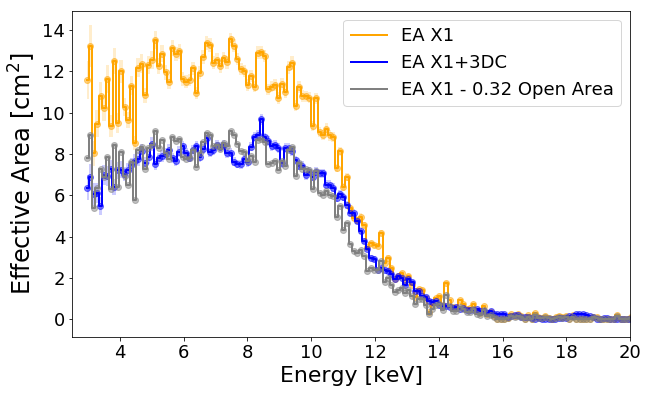

In [16]:
# plot
plt.figure(figsize=(10,6))
plt.step(E_X1[:213], EA_X1[:213], where='mid',linewidth=2,color='orange',label='EA X1')
plt.plot(E_X1[:213],EA_X1[:213],'C1o',color='orange',alpha=0.5,label='_nolegend_')
plt.fill_between(E_X1[:213],EA_X1[:213]-error_X1[:213],
                 EA_X1[:213]+error_X1[:213],alpha=0.2,color='orange',linewidth=0, step='mid')
plt.step(E_X1C[:213], EA_X1C[:213], where='mid',linewidth=2,color='blue',label='EA X1+3DC')
plt.plot(E_X1C[:213],EA_X1C[:213],'C1o',color='blue',alpha=0.5,label='_nolegend_')
plt.fill_between(E_X1C[:213],EA_X1C[:213]-error_X1C[:213],
                 EA_X1C[:213]+error_X1C[:213],alpha=0.2,color='blue',linewidth=0, step='mid')
plt.step(E_X1[:213], ratio*EA_X1[:213], where='mid',linewidth=2,color='gray',label='EA X1 - 0.32 Open Area')
plt.plot(E_X1[:213], ratio*EA_X1[:213],'C1o',color='gray',alpha=0.5,label='_nolegend_')
plt.xlim(2.5,20)
plt.xlabel('Energy [keV]',fontsize=22)
plt.ylabel('Effective Area [cm$^2$]',fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)
plt.show()

In [39]:
Dir = './offaxis/'
paths2014=sorted(Path(Dir).rglob(f"2014*.txt"))
paths2018=sorted(Path(Dir).rglob(f"2018*.txt"))

In [40]:
En_2014, EA_2014 = [], []
for ii,path in enumerate(paths2014) :
    En_2014.append(pd.read_fwf(path,header=None).T.values[0])
    EA_2014.append(pd.read_fwf(path,header=None).T.values[1])
    
En_2018, EA_2018 = [], []
for ii,path in enumerate(paths2018) :
    En_2018.append(pd.read_fwf(path,header=None).T.values[0])
    EA_2018.append(pd.read_fwf(path,header=None).T.values[1])

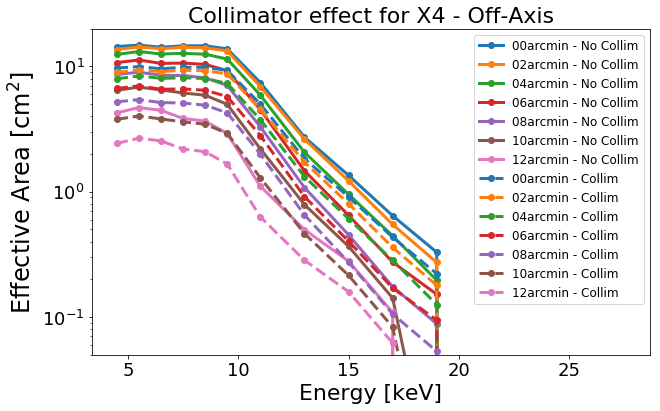

In [43]:
# plot
plt.figure(figsize=(10,6))
# No collimator
plt.plot(En_2014[0], EA_2014[0],'-o',linewidth=3,label='00arcmin - No Collim',color='tab:blue')
plt.plot(En_2014[1], EA_2014[1],'-o',linewidth=3,label='02arcmin - No Collim',color='tab:orange')
plt.plot(En_2014[2], EA_2014[2],'-o',linewidth=3,label='04arcmin - No Collim',color='tab:green')
plt.plot(En_2014[3], EA_2014[3],'-o',linewidth=3,label='06arcmin - No Collim',color='tab:red')
plt.plot(En_2014[4], EA_2014[4],'-o',linewidth=3,label='08arcmin - No Collim',color='tab:purple')
plt.plot(En_2014[5], EA_2014[5],'-o',linewidth=3,label='10arcmin - No Collim',color='tab:brown')
plt.plot(En_2014[6], EA_2014[6],'-o',linewidth=3,label='12arcmin - No Collim',color='tab:pink')
# Collimator
plt.plot(En_2018[0], EA_2018[0],'--o',linewidth=3,label='00arcmin - Collim',color='tab:blue')
plt.plot(En_2018[1], EA_2018[1],'--o',linewidth=3,label='02arcmin - Collim',color='tab:orange')
plt.plot(En_2018[2], EA_2018[2],'--o',linewidth=3,label='04arcmin - Collim',color='tab:green')
plt.plot(En_2018[3], EA_2018[3],'--o',linewidth=3,label='06arcmin - Collim',color='tab:red')
plt.plot(En_2018[4], EA_2018[4],'--o',linewidth=3,label='08arcmin - Collim',color='tab:purple')
plt.plot(En_2018[5], EA_2018[5],'--o',linewidth=3,label='10arcmin - Collim',color='tab:brown')
plt.plot(En_2018[6], EA_2018[6],'--o',linewidth=3,label='12arcmin - Collim',color='tab:pink')

plt.title('Collimator effect for X4 - Off-Axis',fontsize=22)
plt.xlabel('Energy [keV]',fontsize=22)
plt.ylabel('Effective Area [cm$^2$]',fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=12)
plt.yscale('log')
plt.ylim(5e-2,20)
plt.savefig('log_collimator_X4.pdf',bbox_inches='tight')
#plt.savefig('lin_collimator_X4.pdf',bbox_inches='tight')
plt.show()

## Ratio

/Users/Kamilobu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/Users/Kamilobu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/Users/Kamilobu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/Users/Kamilobu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/Users/Kamilobu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/Users/Kamilobu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/Users/Kamilobu/opt/anaconda3/lib/python3.7/site-packages/ipykerne

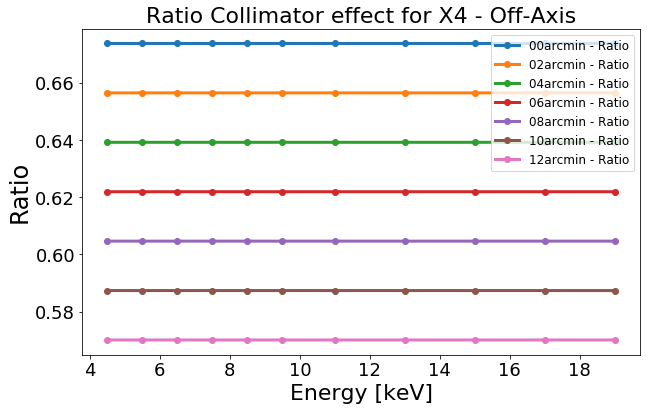

In [42]:
# plot
plt.figure(figsize=(10,6))
# No collimator
plt.plot(En_2014[0], EA_2018[0]/EA_2014[0],'-o',linewidth=3,label='00arcmin - Ratio',color='tab:blue')
plt.plot(En_2014[1], EA_2018[1]/EA_2014[1],'-o',linewidth=3,label='02arcmin - Ratio',color='tab:orange')
plt.plot(En_2014[2], EA_2018[2]/EA_2014[2],'-o',linewidth=3,label='04arcmin - Ratio',color='tab:green')
plt.plot(En_2014[3], EA_2018[3]/EA_2014[3],'-o',linewidth=3,label='06arcmin - Ratio',color='tab:red')
plt.plot(En_2014[4], EA_2018[4]/EA_2014[4],'-o',linewidth=3,label='08arcmin - Ratio',color='tab:purple')
plt.plot(En_2014[5], EA_2018[5]/EA_2014[5],'-o',linewidth=3,label='10arcmin - Ratio',color='tab:brown')
plt.plot(En_2014[6], EA_2018[6]/EA_2014[6],'-o',linewidth=3,label='12arcmin - Ratio',color='tab:pink')

plt.title('Ratio Collimator effect for X4 - Off-Axis',fontsize=22)
plt.xlabel('Energy [keV]',fontsize=22)
plt.ylabel('Ratio',fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=12)
plt.savefig('ratio_collimator_X4.pdf',bbox_inches='tight')
plt.show()


In [44]:
Angles = np.array([0,2,4,6,8,10,12])
OpenArea = (3. + 4.*(0.32 - 0.018*Angles))/7.
OpenArea = (17.4527 + (0.32 - 0.018*Angles)*16.0986)/33.5513
OpenArea

array([0.67372209, 0.65644855, 0.63917502, 0.62190148, 0.60462795,
       0.58735441, 0.57008087])

In [22]:
GeoArea * CollOpenArea

array([6.42934791, 5.80322849, 5.22014889, 1.49703173, 1.33618219,
       1.22899105, 1.08935354])

In [24]:
GeoArea[0:3]

array([6.42934791, 5.80322849, 5.22014889])

In [36]:
GeoArea[0:3].sum()

17.452725287936445

In [33]:
GeoArea[3:7]

array([4.67822416, 4.17556934, 3.84059702, 3.4042298 ])

In [37]:
GeoArea[3:7].sum()

16.09862031442289

In [38]:
GeoArea.sum()

33.55134560235934